# Zacatecas

In [4]:
import pandas as pd

In [18]:
nombre_archivo = './datasets/declaraciones_procesadas_zacatecas.parquet'
df = pd.read_parquet(nombre_archivo, engine='fastparquet')
dfDirectivos = df[(df["sueldo_anual_publico"] != 0)]
dfDirectivos

,id_declaracion,nombre_completo,nombre_archivo,fecha_actualizacion,ingreso_anual_neto_total,sueldo_anual_publico,otros_ingresos_anuales,valor_total_activos,valor_total_deuda,conteo_inmuebles,conteo_vehiculos,conteo_inversiones,conteo_adeudos,nivel_empleo,area_adscripcion,fecha_toma_posesion,tipo_declaracion,declaracion_completa
1,138649s,AARON SANCHEZ TRIANA,data-0000000001.json,2022-05-09T13:26:47Z,367432.0,367432.0,0.0,178150.0,453000,3,3,3,1,DIRECTIVO,Colegio de Estudios Científicos y Tecnológicos...,2001-04-01,MODIFICACIÓN,True
3,80771s,AARON VAZQUEZ ESCALANTE,data-0000000001.json,2021-05-17T14:47:01Z,248736.0,248736.0,0.0,298000.0,0,0,1,0,0,DIRECTIVO,ingenieria de transito,1985-09-01,MODIFICACIÓN,True
4,109743s,AARON CASTAﾑEDA HUERTA,data-0000000001.json,2022-05-19T10:37:17Z,96835.0,96835.0,0.0,0.0,0,0,0,0,0,OPERATIVO,Región 8 Federal,2007-04-16,MODIFICACIÓN,False
5,80398s,AARON SANCHEZ TRIANA,data-0000000001.json,2021-05-14T15:07:38Z,333995008.0,333995008.0,0.0,178150.0,500000,3,3,3,2,DIRECTIVO,Colegio de Estudios Científicos y Tecnológicos...,2001-04-01,MODIFICACIÓN,True
6,191012s,AARON NAJERA SILVA,data-0000000001.json,2023-05-01T12:49:00Z,224072.0,224072.0,0.0,0.0,0,0,0,0,0,ADMINISTRATIVO,ESCUELA PRIMARIA ANTONIO ROSALES,1992-02-16,MODIFICACIÓN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157678,123658s,ZURY YAJAIRA PADILLA MONTOYA,data-0000000789.json,2022-05-02T17:57:13Z,117663.0,117663.0,0.0,0.0,0,0,0,0,0,OPERATIVO,Educativo,2011-08-16,MODIFICACIÓN,False
157679,185499s,ZURY YAJAIRA PADILLA MONTOYA,data-0000000789.json,2023-05-01T12:49:00Z,123754.0,123754.0,0.0,0.0,0,0,0,0,0,OPERATIVO,Educativo,2011-08-16,MODIFICACIÓN,False
157680,69309s,ZUZILI ORTIZ NOYOLA,data-0000000789.json,2021-05-01T09:14:18Z,178084.0,178084.0,0.0,0.0,0,0,0,0,0,OPERATIVO,Hospital de la Mujer Zacatecana,2015-07-01,MODIFICACIÓN,False
157681,158197s,ZUZILI ORTIZ NOYOLA,data-0000000789.json,2023-05-01T01:42:02Z,274042.0,274042.0,0.0,0.0,0,0,0,0,0,OPERATIVO,Hospital de la Mujer Zacatecana,2015-07-01,MODIFICACIÓN,False


In [19]:
df['nivel_empleo'].unique()

array(['DIRECTIVO', 'OPERATIVO', 'ADMINISTRATIVO', 'TITULAR', 'CONFIANZA',
       'BASE', 'SINDICALIZADO', 'CONTRATO', '', 'DE BASE', 'BASE ',
       'ESTATAL', 'NOMBRAMIENTO COMO OFICIAL NOTIFICADOR', 'CONTRATO ',
       'COORDINADOR', 'Base', 'SINDICALIZADA', 'base', 'INTERINA',
       'AUXILIAR', 'Confianza', 'INTENDENTE A ',
       'Oficial Notificador del Nuevo sistema Penal',
       'SECRETARIO AUXILIAR DE JUZGADO LABORAL', 'BASE  ',
       'TRABAJADOR DE BASE', 'ENCARGADO DE AUDIO Y VIDEO', 'DEFINITIVO',
       'BASE SINDICALIZADA', 'BASE.', 'INTERINO', 'SECRETARIA AUXILIAR',
       'DE CONFIANZA', 'SUELDO BASE', 'CONFIANZA, CONTRATO DEFINITIVO',
       'Base ', 'EMPLEADO DE BASE', 'BASIFICADO', 'NOTIFICADOR'],
      dtype=object)

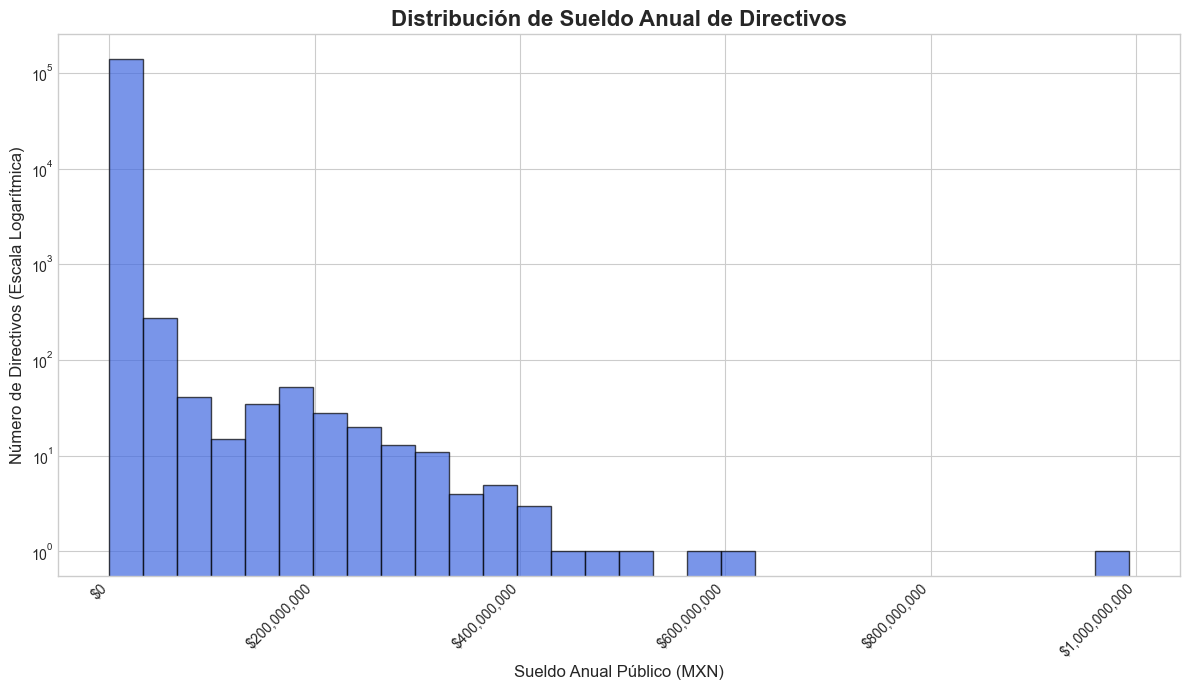

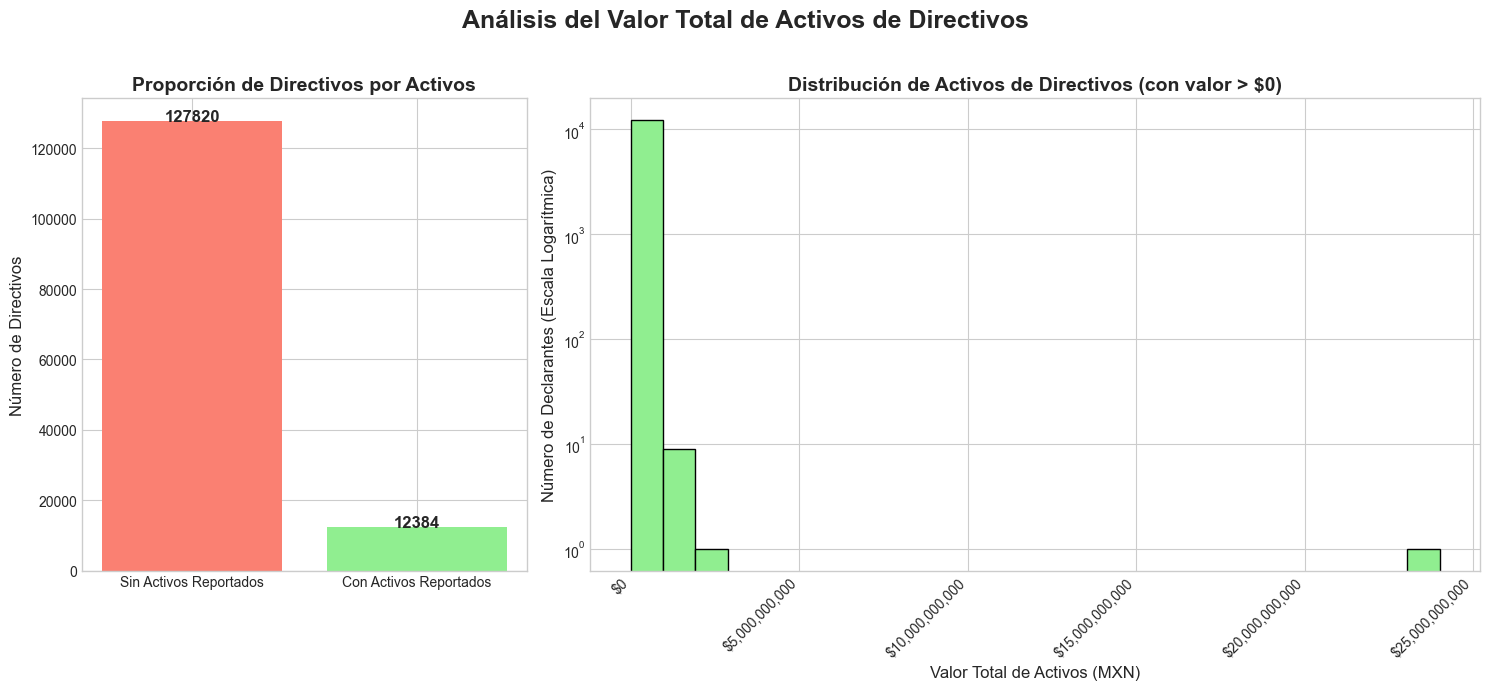

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# --- Gráfica 1: Distribución de Sueldos Anuales (Directivos) ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 7))

ax.hist(dfDirectivos['sueldo_anual_publico'], bins=30, color='royalblue', edgecolor='black', alpha=0.7, log=True)

formatter = mticker.FuncFormatter(lambda x, p: f'${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

ax.set_title('Distribución de Sueldo Anual de Directivos', fontsize=16, weight='bold')
ax.set_xlabel('Sueldo Anual Público (MXN)', fontsize=12)
ax.set_ylabel('Número de Directivos (Escala Logarítmica)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distribucion_sueldos_directivos.png')
plt.show()

# --- Gráfica 2: Análisis de Activos (Directivos) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7), gridspec_kw={'width_ratios': [1, 2]})

conteo_activos_cero = dfDirectivos[dfDirectivos['valor_total_activos'] == 0].shape[0]
conteo_activos_no_cero = dfDirectivos[dfDirectivos['valor_total_activos'] > 0].shape[0]

ax1.bar(['Sin Activos Reportados', 'Con Activos Reportados'],
        [conteo_activos_cero, conteo_activos_no_cero],
        color=['salmon', 'lightgreen'])
ax1.set_title('Proporción de Directivos por Activos', fontsize=14, weight='bold')
ax1.set_ylabel('Número de Directivos', fontsize=12)
for i, count in enumerate([conteo_activos_cero, conteo_activos_no_cero]):
    ax1.text(i, count + 0.5, str(count), ha='center', fontsize=12, weight='bold')

activos_no_cero = dfDirectivos[dfDirectivos['valor_total_activos'] > 0]['valor_total_activos']
if not activos_no_cero.empty:
    ax2.hist(activos_no_cero, bins=25, color='lightgreen', edgecolor='black', log=True)
    ax2.xaxis.set_major_formatter(formatter)
    ax2.set_title('Distribución de Activos de Directivos (con valor > $0)', fontsize=14, weight='bold')
    ax2.set_xlabel('Valor Total de Activos (MXN)', fontsize=12)
    ax2.set_ylabel('Número de Declarantes (Escala Logarítmica)', fontsize=12)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('Análisis del Valor Total de Activos de Directivos', fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('distribucion_activos_directivos.png')
plt.show()

In [21]:
altos_sueldos = dfDirectivos[dfDirectivos['sueldo_anual_publico'] > 100000000]
altos_sueldos

,id_declaracion,nombre_completo,nombre_archivo,fecha_actualizacion,ingreso_anual_neto_total,sueldo_anual_publico,otros_ingresos_anuales,valor_total_activos,valor_total_deuda,conteo_inmuebles,conteo_vehiculos,conteo_inversiones,conteo_adeudos,nivel_empleo,area_adscripcion,fecha_toma_posesion,tipo_declaracion,declaracion_completa
5,80398s,AARON SANCHEZ TRIANA,data-0000000001.json,2021-05-14T15:07:38Z,333995008.0,333995008.0,0.0,178150.000,500000,3,3,3,2,DIRECTIVO,Colegio de Estudios Científicos y Tecnológicos...,2001-04-01,MODIFICACIÓN,True
2025,76746s,ADRIANA ALEJANDRINA GARFIAS ROSALES,data-0000000011.json,2021-05-01T10:56:13Z,366997920.0,366827904.0,170000.0,780375.375,69000,1,1,4,2,DIRECTIVO,DIRECCIÓN ACADÉMICA,2016-11-01,MODIFICACIÓN,True
2685,45324s,AIDEE BERENICE SALCEDO RAMIREZ,data-0000000014.json,2021-05-01T14:08:53Z,101906032.0,101906032.0,0.0,0.000,0,0,0,0,0,ADMINISTRATIVO,32DDI00032,2019-08-15,MODIFICACIÓN,False
3020,73573s,ALBERTO ROMAN GOMEZ,data-0000000016.json,2021-05-05T23:34:12Z,230901056.0,230901056.0,0.0,0.000,0,0,0,0,0,ADMINISTRATIVO,"Dirección General; EMSaD, Cazadero, Saín Alto",2009-02-03,MODIFICACIÓN,False
3419,120607s,ALDO ENRIQUE GAYTAN MARTINEZ,data-0000000018.json,2022-05-01T04:54:15Z,384870016.0,384870016.0,0.0,0.000,0,0,0,0,0,OPERATIVO,EDUCACION PRIMARIA,1993-09-01,MODIFICACIÓN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154888,29955s,YADIRA AVILA CASTAﾑEDA,data-0000000775.json,2021-05-01T12:13:47Z,194672912.0,194672912.0,0.0,0.000,0,0,0,0,0,OPERATIVO,Jardín de Niños Benemérito de las Américas,2005-09-16,MODIFICACIÓN,False
155098,57991s,YAHAIRA AZUCENA VALENZUELA CHAVEZ,data-0000000776.json,2021-05-25T13:58:32Z,193008192.0,193008192.0,0.0,0.000,0,0,0,0,0,OPERATIVO,sep,2020-08-16,MODIFICACIÓN,True
155644,40179s,YECENIA ORTIZ NAVA,data-0000000779.json,2021-05-01T13:53:43Z,193082032.0,193082032.0,0.0,0.000,0,0,0,0,0,OPERATIVO,ESCUELA VICENTE GUERRERO,2018-08-16,MODIFICACIÓN,False
156365,23918s,YOLANDA REYES HERNANDEZ,data-0000000782.json,2021-05-31T20:50:14Z,187263824.0,187263824.0,0.0,0.000,0,0,0,0,0,OPERATIVO,SECRETARIA DE ECONOMÍA,2013-01-01,MODIFICACIÓN,False


In [22]:
dfDirectivos[dfDirectivos['nombre_completo'] == "JOSE MANUEL GARCIA PINEDO"]

,id_declaracion,nombre_completo,nombre_archivo,fecha_actualizacion,ingreso_anual_neto_total,sueldo_anual_publico,otros_ingresos_anuales,valor_total_activos,valor_total_deuda,conteo_inmuebles,conteo_vehiculos,conteo_inversiones,conteo_adeudos,nivel_empleo,area_adscripcion,fecha_toma_posesion,tipo_declaracion,declaracion_completa
74818,25383s,JOSE MANUEL GARCIA PINEDO,data-0000000375.json,2021-05-05T14:02:17Z,117676.0,1.176760e+05,0.0,0.0,0,0,0,0,0,ADMINISTRATIVO,SUBDIRECCION DE INGENIERIAS,2013-01-01,MODIFICACIÓN,False
74819,150808s,JOSE MANUEL GARCIA PINEDO,data-0000000375.json,2023-05-01T00:06:42Z,139186.0,1.391860e+05,0.0,0.0,0,0,0,0,0,ADMINISTRATIVO,DIRECCION DE PROYECTOS,2006-09-12,MODIFICACIÓN,False
74820,97749s,JOSE MANUEL GARCIA PINEDO,data-0000000375.json,2022-05-02T09:13:38Z,127208.0,1.272080e+05,0.0,0.0,0,0,0,0,0,ADMINISTRATIVO,DIRECCION DE PROYECTOS,2006-09-12,MODIFICACIÓN,False
74923,183740s,JOSE MANUEL GARCIA PINEDO,data-0000000375.json,2023-05-08T18:00:24Z,554944.0,5.549440e+05,0.0,1450000.0,150780,2,0,1,2,DIRECTIVO,"SECUNDARIA TÉCNICA 25 ""J. JESÚS LARIOS GUZMÁN""",2019-11-11,MODIFICACIÓN,True
74924,133788s,JOSE MANUEL GARCIA PINEDO,data-0000000375.json,2022-05-03T17:32:21Z,510295008.0,5.102950e+08,0.0,1450000.0,260780,2,0,0,2,DIRECTIVO,"SECUNDARIA TÉCNICA 25 ""J. JESÚS LARIOS GUZMÁN""",2020-08-16,MODIFICACIÓN,True
74925,31703s,JOSE MANUEL GARCIA PINEDO,data-0000000375.json,2021-05-13T21:05:37Z,493442.0,4.934425e+05,0.0,0.0,0,0,0,0,0,DIRECTIVO,"SECUNDARIA TÉCNICA 25 ""J. JESÚS LARIOS GUZMÁN""",2020-08-16,MODIFICACIÓN,False


In [23]:
umbral_sueldo_atipico = 5_000_000
df_atipicos = dfDirectivos[dfDirectivos['sueldo_anual_publico'] > umbral_sueldo_atipico]
nombres_atipicos = df_atipicos['nombre_completo'].unique()
dfDirectivos['fecha_actualizacion'] = pd.to_datetime(dfDirectivos['fecha_actualizacion'])

print(f"Análisis de Sueldos Atípicos (Mayores a ${umbral_sueldo_atipico:,.0f})")
print("===============================================================")

for nombre in nombres_atipicos:
    print(f"\n--- Historial para: {nombre} ---")
    historial_funcionario = dfDirectivos[dfDirectivos['nombre_completo'] == nombre].sort_values(
        by='fecha_actualizacion', 
        ascending=False
    )
    
    for index, row in historial_funcionario.iterrows():
        sueldo = row['sueldo_anual_publico']
        fecha = row['fecha_actualizacion'].strftime('%Y-%m-%d')
        
        etiqueta_atipico = "¡VALOR ATÍPICO!" if sueldo > umbral_sueldo_atipico else ""
        
        print(f"  - Fecha: {fecha} | Sueldo: ${sueldo:,.2f} {etiqueta_atipico}")

C:\Users\sesea4\AppData\Local\Temp\ipykernel_7980\1792525947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDirectivos['fecha_actualizacion'] = pd.to_datetime(dfDirectivos['fecha_actualizacion'])


Análisis de Sueldos Atípicos (Mayores a $5,000,000)

--- Historial para: AARON SANCHEZ TRIANA ---
  - Fecha: 2023-05-01 | Sueldo: $446,240.00 
  - Fecha: 2022-05-09 | Sueldo: $367,432.00 
  - Fecha: 2021-05-14 | Sueldo: $333,995,008.00 ¡VALOR ATÍPICO!

--- Historial para: AARON HERNANDEZ MORALES ---
  - Fecha: 2023-05-26 | Sueldo: $24,878,988.00 ¡VALOR ATÍPICO!
  - Fecha: 2022-05-26 | Sueldo: $225,570.00 
  - Fecha: 2021-05-08 | Sueldo: $192,183.94 

--- Historial para: AARON EDUARDO MONTIEL GAYTAN ---
  - Fecha: 2023-05-04 | Sueldo: $5,302,807.00 ¡VALOR ATÍPICO!
  - Fecha: 2022-05-25 | Sueldo: $552,956.00 
  - Fecha: 2021-05-18 | Sueldo: $487,801.00 

--- Historial para: AARON GUILLERMO OJEDA CARREON ---
  - Fecha: 2023-05-01 | Sueldo: $14,178,031.00 ¡VALOR ATÍPICO!
  - Fecha: 2022-05-01 | Sueldo: $123,630.00 
  - Fecha: 2021-05-05 | Sueldo: $112,722.00 

--- Historial para: ABRAHAM NAJAR ENRIQUEZ ---
  - Fecha: 2023-05-23 | Sueldo: $508,339.00 
  - Fecha: 2022-05-26 | Sueldo: $397,42

In [24]:
conteo_nombres = dfDirectivos['nombre_completo'].value_counts()
nombres_una_vez = conteo_nombres[conteo_nombres == 1].index.tolist()
df_una_sola_vez = dfDirectivos[dfDirectivos['nombre_completo'].isin(nombres_una_vez)]

umbral_sueldo_alto = 5_000_000

funcionarios_criticos = df_una_sola_vez[df_una_sola_vez['sueldo_anual_publico'] > umbral_sueldo_alto]

print(f"Buscando funcionarios con sueldo > ${umbral_sueldo_alto:,.0f} y que solo tienen 1 declaración...")
print("==========================================================================================")

if not funcionarios_criticos.empty:
    print("Se encontraron los siguientes funcionarios que cumplen ambos criterios:")
    print(funcionarios_criticos[[
        'nombre_completo', 
        'sueldo_anual_publico', 
        'area_adscripcion', 
        'fecha_toma_posesion'
    ]].reset_index(drop=True))
else:
    print("\nNo se encontraron funcionarios con sueldo altísimo que aparezcan una sola vez.")


Buscando funcionarios con sueldo > $5,000,000 y que solo tienen 1 declaración...
Se encontraron los siguientes funcionarios que cumplen ambos criterios:
                         nombre_completo  sueldo_anual_publico  \
0                 ADAN HERNANDEZ CHAIREZ            26072280.0   
1          ALAN ULISES GUERRERO MARTINEZ            12289307.0   
2              ALEJANDRA MARTÍNEZ GAMBOA            14194686.0   
3             ALEJANDRO TONCHE RODRIGUEZ            15796824.0   
4                 ALEJANDRO ARCE PANTOJA            32555238.0   
5                   ALICIA MENDEZ LOMELI            20788996.0   
6       AMORETTE JAILINE QUEZADA MARQUEZ            41647720.0   
7             ANA CITLALI MEDRANO ESCOTT            14675376.0   
8                ANABEL HERNANDEZ ARENAS            22675136.0   
9               ANTONIA VILLAGRANA PIÑON            26558316.0   
10       ARISTEO OSVALDO GUERRA CARRILLO            13141856.0   
11              ARTURO BAÑUELOS BAÑUELOS            584